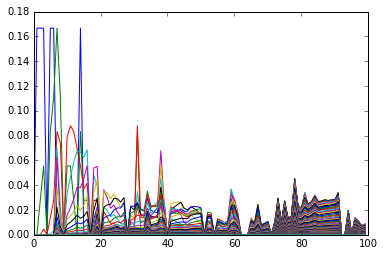

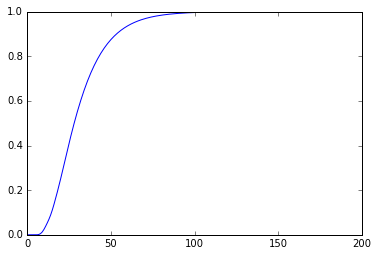

In [7]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

size=100

def special(p, pos_start, pos_end):
  p[pos_start]= np.zeros(size+1)
  p[pos_start][pos_start]=1
  
  #make sure that p stays row stocastic
  #i.e the sum of each row must be always kept to 1
  for i in range(size+1):
    pp = p[i][pos_start]
    p[i][pos_start] = 0
    p[i][pos_end]   = p[i][pos_end] + pp

def snake(p, pos_start, pos_end=0):
  if (pos_end<pos_start):
    special(p, pos_start, pos_end)

def ladder(p, pos_start, pos_end=size):
  if (pos_end>pos_start):
    special(p, pos_start, pos_end)

def nullgame():
  p=np.zeros((size+1,size+1))
  
  for i in range(size+1):
    for j in range(6):
      if (i+j<size):
        p[i][i+j+1]=1.0/6.0
  
  p[size][size]=1
  
  p[size-1][size]=6.0/6.0
  p[size-2][size]=5.0/6.0
  p[size-3][size]=4.0/6.0
  p[size-4][size]=3.0/6.0
  p[size-5][size]=2.0/6.0
  p[size-6][size]=1.0/6.0
  
  return p

a=np.zeros(size+1)
p=nullgame()

full_game = True
if full_game:

    starting = [4,9,17,20,28,40,51,54,62, 64,63,71,93,95,92]
    ending  = [14,31,7,38,84,59,67,34,19, 60,81,91,73,75,78]

    for i in range(0,len(starting)):
        if starting[i] < ending[i]:
            ladder(p,starting[i],ending[i])
        else:
            snake(p,starting[i],ending[i])

#initial matrix is p
m=p

iterations = 200
pr_end=np.zeros(iterations)

for k in range(iterations):
  #plot the probability distribution at the k-th iteration
  pyplot.figure(1)
  pyplot.plot(m[0][0:size])
  
  #store the probability of ending after the k-th iteration
  pr_end[k] = m[0][size]
    
  #calculate the stocastic matrix for iteration k+1
  m=np.dot(m,p)
    
#plot the probability of ending the game
# after k iterations
pyplot.figure(2)
pyplot.plot(pr_end[0:iterations-1])

#show the two graphs
pyplot.show()
